In [2]:
import pickle
import random
import os, sys
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## Plot settings and general definitions

In [3]:
blue, red = '#00adee', '#ff0000'

linestyles = {'cartoonX' : '-', 'pixel_rde' : '-', 'random_pixel' : '--', 'random_wavelet' : '--'}
colors = {'cartoonX' : blue, 'pixel_rde' : red, 'random_pixel' : red, 'random_wavelet' : blue}
labels = {'cartoonX' : 'CartoonX', 'pixel_rde' : 'Pixel RDE', 'random_pixel' : 'Random Pixel', 'random_wavelet' : 'Random Wavelets'}

linestyles_c = {'dists_CNX' : '-', 'dists_RDE' : '-', 'sparsities_CNX' : '--', 'sparsities_RDE' : '--'}
colors_c = {'dists_CNX' : blue, 'dists_RDE' : red, 'sparsities_CNX' : blue, 'sparsities_RDE' : red}
labels_c = {'dists_CNX' : 'CartoonX Distortion', 'dists_RDE' : 'Pixel RDE Distortion', 'sparsities_CNX' : r'Cartoon X $||s||_1/k$', 'sparsities_RDE' : r'Pixel RDE X $||s||_1/k$'}

fontsize = 22
figsize = (8, 4)
plt.rcParams.update({'font.size': fontsize})

SAVE_FIG = False


In [4]:
# Manually set the path and config for the experiment results
exp_results_path = '../logs/'
experiment = 'result1'
l1lambda = 'CNX20_RDE4'
plot_stds = [False]

# Reproducibility Experiment 

## Subexperiment 1: Non-randomized relevant components

Shape of data = (98, 101)


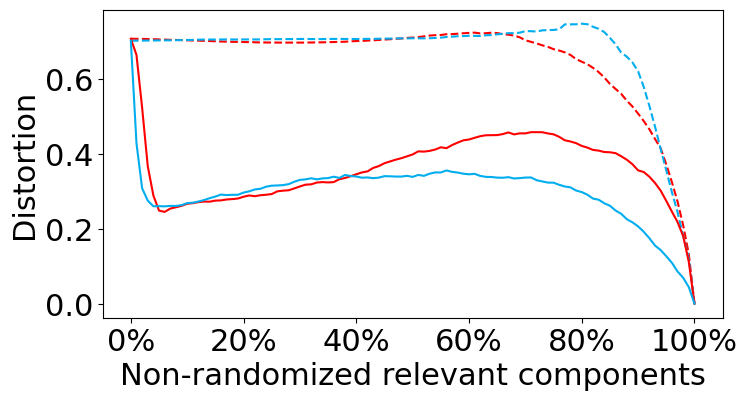

In [5]:
def plot(data, xlabel, plot_std, save_name, legend = True, normalize_distortions = False):

    fig, ax = plt.subplots(1, 1, figsize=figsize)

    for key, value in data.items():
        mean, std = np.mean(value, axis = 0), np.std(value, axis = 0)
        x = np.arange(mean.shape[0])
        if normalize_distortions:
            if np.abs(np.max(mean) - mean[-1]) < 0.1:
                mean = mean / mean[-1] * 100
            else:
                mean = mean / mean[0] * 100
        ax.plot(x, mean, label=labels[key], linestyle=linestyles[key], color=colors[key])
        if plot_std: ax.fill_between(x, mean - std, mean + std, alpha=0.2, color=colors[key])
        
        # Put percentage behind the xticks
        ax.set_xticks(np.arange(0, 101, 20))
        ax.set_xticklabels([f'{x}%' for x in np.arange(0, 101, 20)])

    if normalize_distortions:
        ax.set_ylabel('Normalized \nDistortion [%]')
    else:
        ax.set_ylabel('Distortion')
    ax.set_xlabel(xlabel)

    if legend: ax.legend(loc = 'lower right')

    if SAVE_FIG: fig.savefig(f'figures/{save_name}', bbox_inches='tight')


xlabel_a = 'Non-randomized relevant components'
with open(exp_results_path + f'{experiment}/distortion_curves_a_l1lambda{l1lambda}.pickle', 'rb') as f:
    data_a = pickle.load(f)
print('Shape of data =', np.array(data_a['cartoonX']).shape)

for plot_std in plot_stds:
    plot(data_a, xlabel_a, plot_std, '7a.pdf', legend = False)


## Subexperiment 2: Randomized relevant components

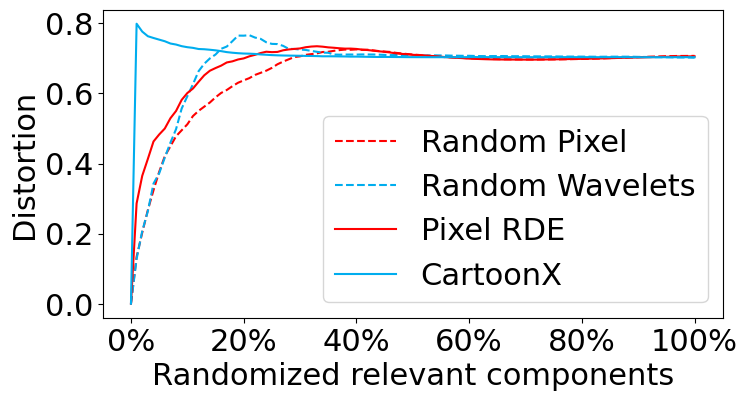

In [6]:
xlabel_b = 'Randomized relevant components'
with open(exp_results_path + f'{experiment}/distortion_curves_b_l1lambda{l1lambda}.pickle', 'rb') as f:
    data_b = pickle.load(f)
save_name = '7b.pdf'
for plot_std in plot_stds:
    plot(data_b, xlabel_b, plot_std, save_name)

## Subexperiment 3: $\lambda$-exploration

(5, 85)


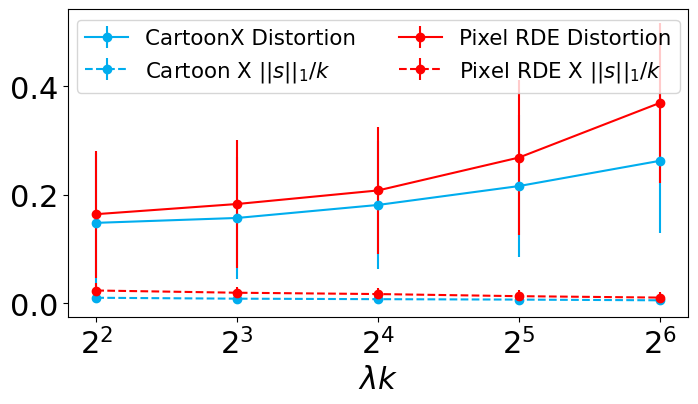

In [7]:
l1lambdas = np.power(2, np.arange(2, 7))
plot_stds_c= [True]

with open(exp_results_path + f'{experiment}/lambda_exploration.pickle', 'rb') as f:
    data_c = pickle.load(f)
print(data_c['dists_CNX'].shape)

for plot_std in plot_stds_c:

    fig, ax = plt.subplots(1, 1, figsize=figsize)

    for key, value in data_c.items():
        mean, std = np.mean(value, axis = 1), np.std(value, axis = 1)

        if plot_std:
            ax.errorbar(l1lambdas, mean, yerr = std, label=labels_c[key], linestyle=linestyles_c[key], color=colors_c[key], marker = 'o')
        else:
            ax.plot(l1lambdas, mean, label=labels_c[key], linestyle=linestyles_c[key], color=colors_c[key], marker = 'o')

        ax.legend(loc = 'upper center', ncol = 2, fontsize = fontsize*0.7)
        ax.set_xscale('log')

        ax.set_xticks(l1lambdas)
        ax.set_xticklabels([fr'$2^{i.astype(int)}$' for i in np.log2(l1lambdas)]) # Plot xticks as power of 2
        ax.tick_params(axis='x', which='minor', bottom=False) # Turn off minor ticks 

    ax.set_xlabel(r'$\lambda k$')
    if SAVE_FIG: fig.savefig(f'figures/7c.pdf', bbox_inches='tight')

    plt.show()


# Quantitative evaluation of ViT Experiment

In [8]:
fontsize = 22
figsize = (8, 4)
plt.rcParams.update({'font.size': fontsize})

blue, red = '#00adee', '#ff0000'
dark_blue, dark_red = '#0077b3', '#990000'
green = '#2FC12F'

linestyles = {'cartoonX_CNN' : '-', 'cartoonX_ViT' : '-', 'pixel_rde' : '-', 'random_pixel_CNN' : '--', 'random_wavelet_CNN' : '--', 'random_pixel_ViT' : '--', 'random_wavelet_ViT' : '--', 'attention_mask' : '-'}
colors = {"random_pixel_CNN": red,
"random_wavelet_CNN": blue,
"random_pixel_ViT": dark_red,
"random_wavelet_ViT": dark_blue,
"cartoonX_CNN": blue,
"cartoonX_ViT": dark_blue,
"attention_mask": green}
labels = {'cartoonX_CNN' : 'CartoonX (CNN)', 'cartoonX_ViT' : 'CartoonX (ViT)', 'random_pixel_CNN' : 'R. Pixel (CNN)', 'random_wavelet_CNN' : 'R. Wavelets (CNN)', 'random_pixel_ViT' : 'R. Pixel (ViT)', 'random_wavelet_ViT' : 'R. Wavelets (ViT)', 'attention_mask' : 'Attention rollout'}

In [9]:
# Manually set the path and config for the experiment results
exp_results_path = '../logs/'
experiment = 'result2/'
l1lambda = 'CNX20_RDE4'
plot_stds = [False]

## Subexperiment 1: Non-randomized relevant components

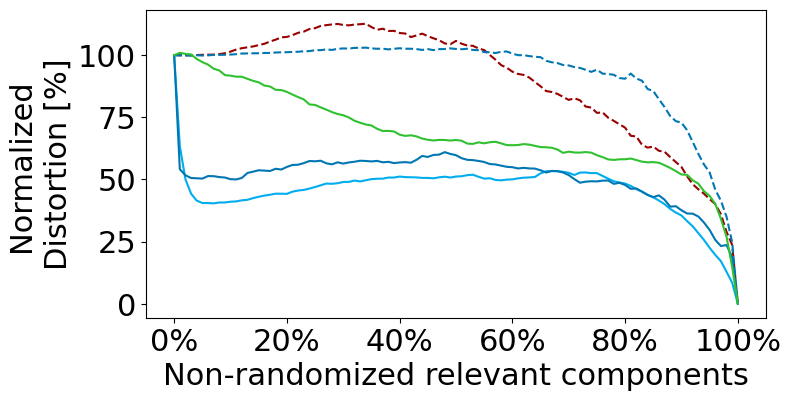

In [10]:
vit_curves = ['random_pixel_ViT', 'random_wavelet_ViT', 'cartoonX_CNN', 'cartoonX_ViT', 'attention_mask']
with open(exp_results_path + f'{experiment}/distortion_curves_a_l1lambda{l1lambda}.pickle', 'rb') as f:
    data_a = pickle.load(f)
data_a_selection = {key: data_a[key] for key in vit_curves}

for plot_std in plot_stds:
    plot(data_a_selection, xlabel_a, plot_std, 'ViT-a.pdf', legend = False, normalize_distortions = True)

## Subexperiment 2: Randomized relevant components

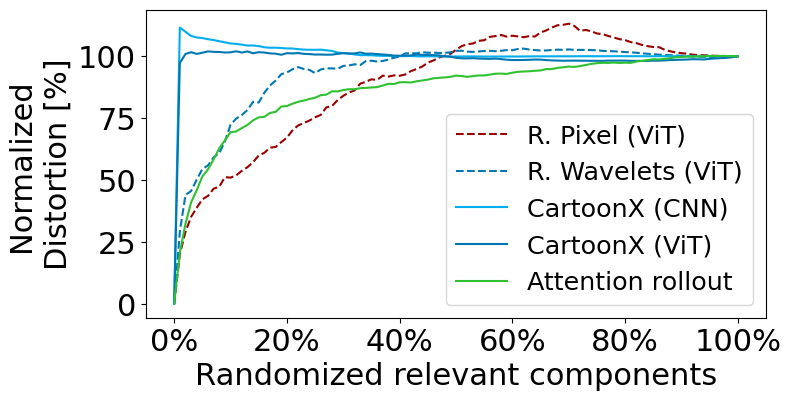

In [11]:
with open(exp_results_path + f'{experiment}/distortion_curves_b_l1lambda{l1lambda}.pickle', 'rb') as f:
    data_b = pickle.load(f)
data_b_selection = {key: data_b[key] for key in vit_curves}
plt.rc('legend',fontsize='small')
for plot_std in plot_stds:
    plot(data_b_selection, xlabel_b, plot_std, 'ViT-b.pdf', normalize_distortions = True)